# Regression Example: Used Car Price Prediction

This notebook introduces the steps to build a regression model to predict the resale price of an used car.

### Dataset

**Filename**: final_cars_maruti.csv

It is a comma separated file and there are 11 columns in the dataset.

1. Model - Model of the car
2. Location - The location in which the car was sold.
3. Age - Age of the car when the car was sold from the year of purchase.
4. KM_Driven - The total kilometers are driven in the car by the previous owner(s) in '000 kms.
5. Fuel_Type - The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
6. Transmission - The type of transmission used by the car. (Automatic / Manual)
7. Owner_Type - First, Second, Third, or Fourth & Above
8. Mileage - The standard mileage offered by the car company in kmpl or km/kg
9. Power - The maximum power of the engine in bhp.
10. Seats - The number of seats in the car.
11. Price - The resale price of the car (target).


## 1. Loading the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
cars_df = pd.read_csv( "final_cars_maruti.csv" )

In [4]:
cars_df.sample(5)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
67,Coimbatore,Petrol,Automatic,First,5,9.89,2,baleno,21.40,83.10,12
394,Chennai,Petrol,Manual,Third,5,1.20,12,alto,19.70,46.30,68
656,Chennai,Petrol,Manual,First,5,4.30,5,celerio,23.10,67.04,57
257,Chennai,Petrol,Manual,First,5,2.79,5,alto,22.74,47.30,21
934,Hyderabad,Diesel,Manual,First,5,2.95,9,ritz,21.10,73.90,127


In [5]:
cars_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      1009 non-null   object 
 1   Fuel_Type     1009 non-null   object 
 2   Transmission  1009 non-null   object 
 3   Owner_Type    1009 non-null   object 
 4   Seats         1009 non-null   int64  
 5   Price         1009 non-null   float64
 6   Age           1009 non-null   int64  
 7   Model         1009 non-null   object 
 8   Mileage       1009 non-null   float64
 9   Power         1009 non-null   float64
 10  KM_Driven     1009 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 86.8+ KB


### Relationship between Age and Price

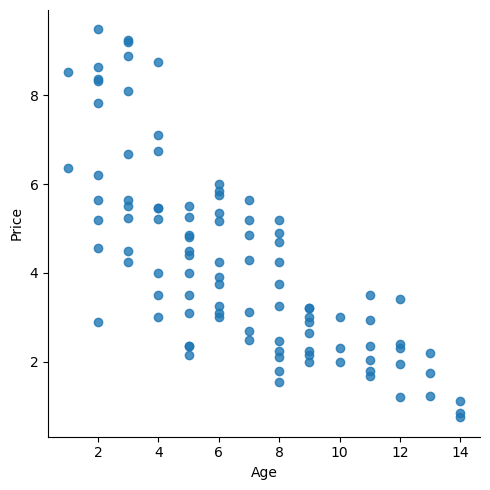

In [6]:
sn.lmplot( data = cars_df.sample(100),
           x = 'Age',
           y = 'Price',
           fit_reg = False);

## 2. Simple Linear Regression

Assumes linear relationship between features and outcome variable.

Simple linear regression is given by,

$\hat{Y} = \beta_{0} + \beta_{1}X$
									
- $\beta_{0}$ and $\beta_{1}$ are the regression coefficients
- $\hat{Y}$ is the predicted value of ${Y}$.


So, the error (Mean Squared Error) is:

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\hat{Y}))}^2$

or 

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))}^2$




Regression Explained: https://mlu-explain.github.io/linear-regression/

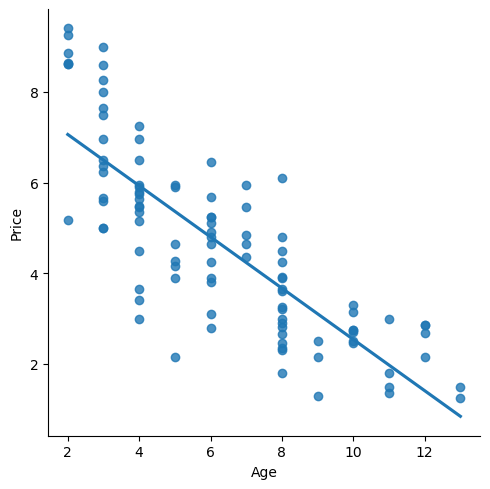

In [7]:
sn.lmplot( data = cars_df.sample(100),
           x = 'Age',
           y = 'Price',
           fit_reg = True,
           ci = False);

### Setting X and Y Variables

In [8]:
X = pd.DataFrame(cars_df['Age'])
y = cars_df['Price']

### Splitting the dataset

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)

In [11]:
X_train.shape

(807, 1)

In [12]:
X_test.shape

(202, 1)

### Building the Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lreg_v1 = LinearRegression()
lreg_v1.fit(X_train, y_train)

LinearRegression()

### Finding the model parameters

In [15]:
lreg_v1.intercept_

7.764605206861869

In [16]:
lreg_v1.coef_

array([-0.50860722])

### Predicting on Test Set 

In [17]:
y_pred = lreg_v1.predict(X_test)

In [18]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [19]:
y_df.sample(10, random_state = 100)

,actual,predicted,residual
165,1.65,2.678533,1.028533
277,6.84,5.221569,-1.618431
97,3.27,5.221569,1.951569
721,1.75,1.661319,-0.088681
218,4.25,4.712962,0.462962
261,4.50,3.695747,-0.804253
855,3.60,5.221569,1.621569
673,7.40,5.221569,-2.178431
692,2.15,1.661319,-0.488681
940,4.25,3.695747,-0.554253


### Error or Accuracy Analysis: RMSE

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mse = mean_squared_error(y_df.actual, y_df.predicted)

In [22]:
rmse = np.sqrt(mse)

In [23]:
rmse

1.5572075996204116

### What is R-quared?

R-squared is a statistical measure that indicates how much of the variation of a dependent variable is explained by an independent variable in a regression model.

https://www.investopedia.com/terms/r/r-squared.asp


Total Variance in Y = $\sum_{i=1}^{N}(Y_{i} - \bar{Y})^2$ 

where, 

- $\bar{Y}$ is the mean of Y.

Unexplained Variance = $\sum_{i=1}^{N}(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))^2$  


$R^{2}$ is given by:

$R^{2}$ = $\frac{Unexplained\ Variance}{Total\ Variance}$


Notes:

- R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. 
- What is a “good” R-squared value depends on the domain or context. In the field of social sciences, even a relatively low R-squared, such as 0.5, could be considered relatively strong. In other fields, the standards for a good R-squared reading can be much higher, such as 0.9 or above. In finance, an R-squared above 0.7 would generally be seen as showing a high level of correlation. [Source](https://www.investopedia.com/terms/r/r-squared.asp)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test, y_pred)

0.44925155357671054

### Participants Exercise: 1

Build a model by adding the following two parameters and measure accuracy in terms of RMSE and R2.

- Age
- KM_Driven

## 3. Building a model with more variables

Based on most important questions that customers ask

- Which model is it? (categorical feature)
- How old the vehicle is?
- How many kilometers it is driven?
    

### Feature Set Selection

In [26]:
x_features = ['Model', 'Age', 'KM_Driven']

### How to encode categorical variables?

OHE: One Hot Encoding

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [27]:
encoded_cars_df = pd.get_dummies(cars_df[x_features], 
                                 columns=['Model'],
                                 drop_first=True)

In [28]:
encoded_cars_df.sample(5)

,Age,KM_Driven,Model_alto,Model_baleno,Model_celerio,Model_ciaz,Model_dzire,Model_eeco,Model_ertiga,Model_omni,Model_ritz,Model_swift,Model_vitara,Model_wagon,Model_zen
755,13,75,0,0,0,0,0,0,0,0,0,0,0,0,1
665,5,168,0,0,0,0,0,0,0,0,0,1,0,0,0
426,8,56,0,0,0,0,0,0,0,0,0,1,0,0,0
364,7,40,0,0,0,0,0,0,0,0,0,1,0,0,0
583,4,22,0,0,0,0,0,0,0,0,1,0,0,0,0


In [29]:
encoded_cars_df.columns

Index(['Age', 'KM_Driven', 'Model_alto', 'Model_baleno', 'Model_celerio',
       'Model_ciaz', 'Model_dzire', 'Model_eeco', 'Model_ertiga', 'Model_omni',
       'Model_ritz', 'Model_swift', 'Model_vitara', 'Model_wagon',
       'Model_zen'],
      dtype='object')

In [30]:
encoded_cars_df.shape

(1009, 15)

### Setting X and y variables

In [31]:
X = encoded_cars_df
y = cars_df['Price']

### Data Splitting

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)

In [34]:
X_train.shape

(807, 15)

In [35]:
X_test.shape

(202, 15)

## 4. Multiple Linear Regression Model


Simple linear regression is given by,

$\hat{Y} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{n}X_{n}$
									
- $\beta_{0}$, $\beta_{1}$...$\beta_{n}$  are the regression coefficients

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lreg_v2 = LinearRegression()

In [38]:
lreg_v2.fit(X_train, y_train)

LinearRegression()

### Understanding model parameters

In [39]:
lreg_v2.intercept_

5.887213245012408

In [40]:
lreg_v2.coef_

array([-0.32402005, -0.00464012, -0.92820431,  2.23524902, -0.0797989 ,
        3.1688257 ,  2.09771944, -0.68873372,  3.16334028, -1.20959284,
        0.55453796,  1.15512616,  4.04871544, -0.28438322, -0.20691443])

In [41]:
dict(zip(X_train.columns, 
         np.round(lreg_v2.coef_, 3)))

{'Age': -0.324,
 'KM_Driven': -0.005,
 'Model_alto': -0.928,
 'Model_baleno': 2.235,
 'Model_celerio': -0.08,
 'Model_ciaz': 3.169,
 'Model_dzire': 2.098,
 'Model_eeco': -0.689,
 'Model_ertiga': 3.163,
 'Model_omni': -1.21,
 'Model_ritz': 0.555,
 'Model_swift': 1.155,
 'Model_vitara': 4.049,
 'Model_wagon': -0.284,
 'Model_zen': -0.207}

### Predict on test set

In [42]:
y_pred = lreg_v2.predict(X_test)

In [43]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [44]:
y_df.sample(10, random_state = 100)

,actual,predicted,residual
165,1.65,1.740854,0.090854
277,6.84,7.222493,0.382493
97,3.27,4.520043,1.250043
721,1.75,1.334100,-0.415900
218,4.25,4.833732,0.583732
261,4.50,4.255294,-0.244706
855,3.60,3.992429,0.392429
673,7.40,7.134331,-0.265669
692,2.15,2.833931,0.683931
940,4.25,4.116091,-0.133909


### Measuring Accuracy

In [45]:
r2_score(y_test, y_pred)

0.8700816725082439

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [48]:
mse_v1

0.5720186245255433

In [49]:
rmse_v1 = np.sqrt(mse_v1)

### Participants Exercise: 2

Build a model by adding the following five parameters and measure accuracy in terms of RMSE and R2.

- Age
- KM_Driven
- Model
- Transmission Type
- Fuel Type

## 4. Building model with all the variables

### Feature Set Selection

In [50]:
list(cars_df.columns)

['Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Price',
 'Age',
 'Model',
 'Mileage',
 'Power',
 'KM_Driven']

In [51]:
x_features = list(cars_df.columns)
x_features.remove('Price')

In [52]:
cat_features = ['Fuel_Type', 
                'Transmission', 
                'Owner_Type',
                'Model', 
                'Location']

In [53]:
num_features = list(set(x_features) - set(cat_features))

In [54]:
num_features

['Age', 'Power', 'Mileage', 'KM_Driven', 'Seats']

In [55]:
cars_df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      1009 non-null   object 
 1   Fuel_Type     1009 non-null   object 
 2   Transmission  1009 non-null   object 
 3   Owner_Type    1009 non-null   object 
 4   Seats         1009 non-null   int64  
 5   Age           1009 non-null   int64  
 6   Model         1009 non-null   object 
 7   Mileage       1009 non-null   float64
 8   Power         1009 non-null   float64
 9   KM_Driven     1009 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 79.0+ KB


In [56]:
cars_df.shape

(1009, 11)

### Encoding Categorical Variables


In [57]:
encoded_cars_df = pd.get_dummies(cars_df[x_features], 
                                 columns=cat_features,
                                 drop_first=True)

In [58]:
encoded_cars_df.sample(5)

,Seats,Age,Mileage,Power,KM_Driven,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Model_alto,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
364,5,7,19.10,85.80,40,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
548,5,6,19.10,85.80,57,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
958,5,5,20.85,83.14,24,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
386,5,5,20.40,81.80,29,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
917,5,11,17.50,85.80,71,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [59]:
encoded_cars_df.columns

Index(['Seats', 'Age', 'Mileage', 'Power', 'KM_Driven', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Second', 'Owner_Type_Third',
       'Model_alto', 'Model_baleno', 'Model_celerio', 'Model_ciaz',
       'Model_dzire', 'Model_eeco', 'Model_ertiga', 'Model_omni', 'Model_ritz',
       'Model_swift', 'Model_vitara', 'Model_wagon', 'Model_zen',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune'],
      dtype='object')

In [60]:
encoded_cars_df.shape

(1009, 32)

### Setting X and y variables

In [61]:
X = encoded_cars_df
y = cars_df['Price']

### Data Splitting

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)

In [64]:
X_train.shape

(807, 32)

In [65]:
X_test.shape

(202, 32)

### Build Model

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lreg_v3 = LinearRegression()

In [68]:
lreg_v3.fit(X_train, y_train)

LinearRegression()

### Understanding model parameters

In [69]:
lreg_v3.intercept_

5.1917140517834435

In [70]:
lreg_v3.coef_

array([ 0.03573073, -0.24354343,  0.04458248, -0.00478193, -0.01029664,
       -0.26482787, -0.5471103 , -0.16664669, -0.29517094, -0.84893452,
        2.53088925, -0.13538118,  3.42462821,  1.88570615, -0.28869397,
        3.50422446, -1.18900758,  0.51706947,  1.4599227 ,  4.17808545,
        0.2011008 , -0.09051386,  0.65255356,  0.20746709,  1.08040502,
       -0.34327838,  0.79412103,  0.14780259,  0.35482406, -0.81241507,
       -0.17939013,  0.01321411])

In [71]:
dict(zip(X_train.columns, 
         np.round(lreg_v3.coef_, 3)))

{'Seats': 0.036,
 'Age': -0.244,
 'Mileage': 0.045,
 'Power': -0.005,
 'KM_Driven': -0.01,
 'Fuel_Type_Petrol': -0.265,
 'Transmission_Manual': -0.547,
 'Owner_Type_Second': -0.167,
 'Owner_Type_Third': -0.295,
 'Model_alto': -0.849,
 'Model_baleno': 2.531,
 'Model_celerio': -0.135,
 'Model_ciaz': 3.425,
 'Model_dzire': 1.886,
 'Model_eeco': -0.289,
 'Model_ertiga': 3.504,
 'Model_omni': -1.189,
 'Model_ritz': 0.517,
 'Model_swift': 1.46,
 'Model_vitara': 4.178,
 'Model_wagon': 0.201,
 'Model_zen': -0.091,
 'Location_Bangalore': 0.653,
 'Location_Chennai': 0.207,
 'Location_Coimbatore': 1.08,
 'Location_Delhi': -0.343,
 'Location_Hyderabad': 0.794,
 'Location_Jaipur': 0.148,
 'Location_Kochi': 0.355,
 'Location_Kolkata': -0.812,
 'Location_Mumbai': -0.179,
 'Location_Pune': 0.013}

### Predict on test set

In [72]:
y_pred = lreg_v3.predict(X_test)

In [73]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [74]:
y_df.sample(10, random_state = 100)

,actual,predicted,residual
165,1.65,1.507387,-0.142613
277,6.84,7.135081,0.295081
97,3.27,3.980634,0.710634
721,1.75,1.324010,-0.425990
218,4.25,4.661349,0.411349
261,4.50,3.968787,-0.531213
855,3.60,4.044318,0.444318
673,7.40,7.253996,-0.146004
692,2.15,2.557647,0.407647
940,4.25,4.248335,-0.001665


### Measuring Accuracy: RMSE and R2

In [75]:
r2_score(y_test, y_pred)

0.9310149526263481

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [78]:
mse_v1

0.30373491310538725

In [79]:
rmse_v1 = np.sqrt(mse_v1)

In [80]:
rmse_v1

0.551121504847513

## What are the reasons for the remaining error?

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Noise (randomness)
   

## Error Analysis: Deep Dive

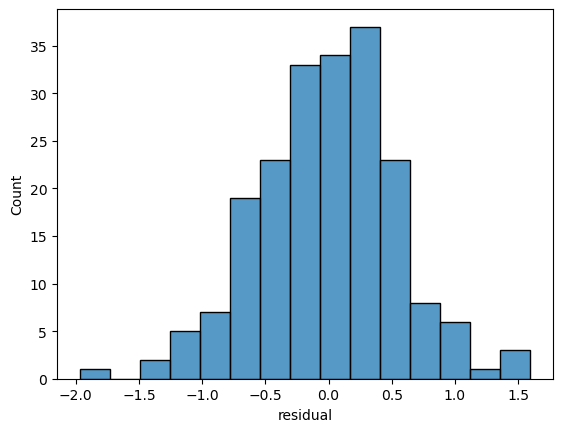

In [81]:
sn.histplot(y_df.residual);

In [82]:
y_df.residual.mean()

-0.002140653888417827

In [83]:
from scipy import stats

In [84]:
stats.norm.interval(0.50,
                    y_df.residual.mean(),
                    y_df.residual.std())

(-0.37478719275902145, 0.3705058849821858)

In [85]:
stats.norm.interval(0.90,
                    y_df.residual.mean(),
                    y_df.residual.std())

(-0.9109002174756099, 0.9066189096987739)

### Plotting Predicted Values Vs. Actual Values

In [86]:
X_test.index

Int64Index([ 680,  661,  305,  318,  523,  262,  693,  538,  527, 1003,
            ...
             412,   68,  323,  692,  631,  395,  297,  942,  981,  403],
           dtype='int64', length=202)

In [87]:
X_test_df = cars_df[cars_df.index.isin(X_test.index)]

In [88]:
X_test_df[0:5]

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
5,Kochi,Diesel,Manual,First,5,8.63,2,vitara,24.30,88.5,50
12,Jaipur,Diesel,Manual,First,5,3.75,8,swift,22.90,74.0,95
19,Kochi,Petrol,Manual,First,5,7.47,3,ciaz,20.73,91.1,44
22,Chennai,Petrol,Manual,Second,5,1.60,10,alto,19.70,46.3,94
30,Mumbai,Petrol,Automatic,First,5,4.22,4,wagon,20.51,67.0,8


In [91]:
X_test_df.shape

(202, 11)

In [89]:
y_df.shape

(202, 3)

In [90]:
y_df = y_df.sort_index()

In [140]:
y_df[0:5]

,actual,predicted,residual
5,8.63,9.014402,0.384402
12,3.75,4.171531,0.421531
19,7.47,7.642761,0.172761
22,1.60,1.003869,-0.596131
30,4.22,4.664701,0.444701


### Joining the test data with predictions

In [92]:
X_test_df = X_test_df.join(y_df)

In [93]:
X_test_df[0:5]

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven,actual,predicted,residual
5,Kochi,Diesel,Manual,First,5,8.63,2,vitara,24.30,88.5,50,8.63,9.014402,0.384402
12,Jaipur,Diesel,Manual,First,5,3.75,8,swift,22.90,74.0,95,3.75,4.171531,0.421531
19,Kochi,Petrol,Manual,First,5,7.47,3,ciaz,20.73,91.1,44,7.47,7.642761,0.172761
22,Chennai,Petrol,Manual,Second,5,1.60,10,alto,19.70,46.3,94,1.60,1.003869,-0.596131
30,Mumbai,Petrol,Automatic,First,5,4.22,4,wagon,20.51,67.0,8,4.22,4.664701,0.444701


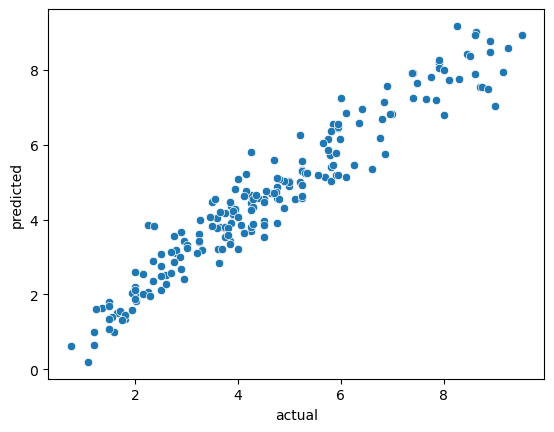

In [94]:
sn.scatterplot(data = X_test_df,
               x = 'actual',
               y = 'predicted');

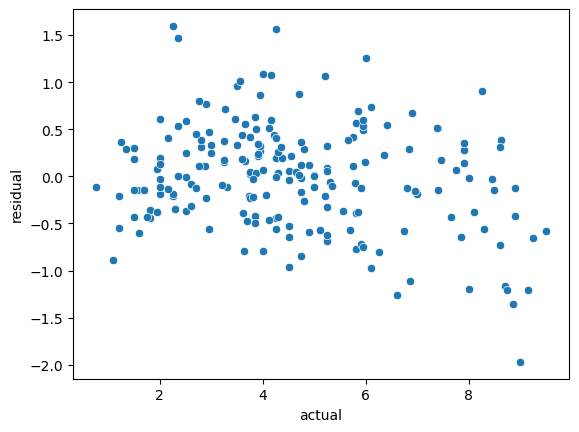

In [95]:
sn.scatterplot(data = X_test_df,
               x = 'actual',
               y = 'residual');

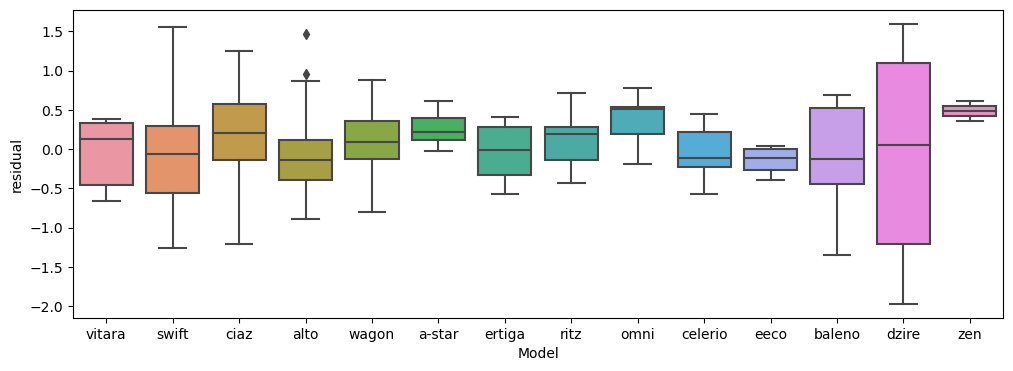

In [96]:
plt.figure(figsize = (12, 4))
sn.boxplot(data = X_test_df,
           x = 'Model',
           y = 'residual');

In [98]:
X_test_df[X_test_df.Model == 'ritz'].sort_values('residual', ascending = True)[0:2]

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven,actual,predicted,residual
748,Hyderabad,Petrol,Manual,First,5,4.3,7,ritz,21.1,85.8,80,4.3,3.871486,-0.428514
363,Kolkata,Diesel,Manual,First,5,2.5,9,ritz,21.1,73.9,77,2.5,2.130486,-0.369514


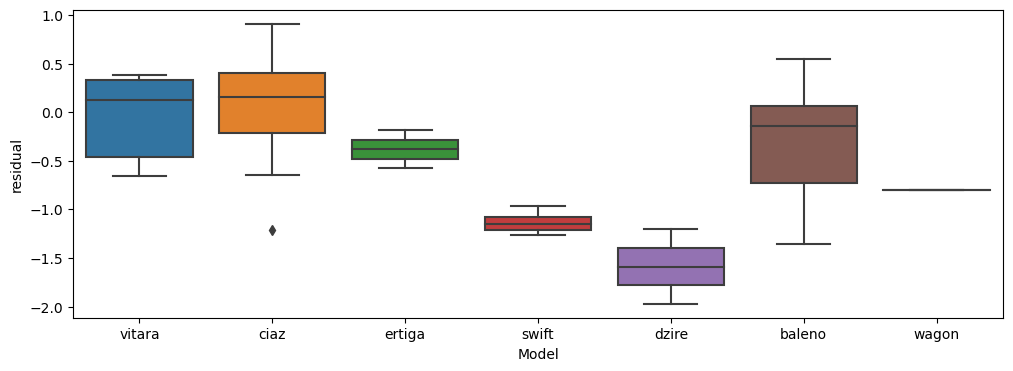

In [99]:
plt.figure(figsize = (12, 4))
sn.boxplot(data = X_test_df[X_test_df.actual > 6.0],
           x = 'Model',
           y = 'residual');

### Participant Exercise: 3

Take different training set, build model and measure the model accuracy. But, how to sample differenent training and test sets?
- Change the random_state to different numbers while training and test splits and then measure the r2 values.
- Repeat the above process for 5 different random_states and make a note of the r2 values.

## 5. Model Explanation

In [100]:
#!pip install eli5

In [112]:
from eli5 import show_weights, explain_weights

In [125]:
show_weights(lreg_v3, 
             feature_names = list(X_train.columns))

In [110]:
from eli5 import show_prediction

In [139]:
show_prediction(lreg_v3, X_test.sample(1), 
                feature_names = list(X_train.columns),
                show_feature_values = True)

## 6. Storing the model

In [98]:
class CarPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [99]:
my_model = CarPredictionModel(lreg_v3, list(X_train.columns), rmse_v1)

In [100]:
my_model.rmse

0.551121504847513

In [101]:
from joblib import dump

In [103]:
dump(my_model, './cars.pkl')

['./cars.pkl']